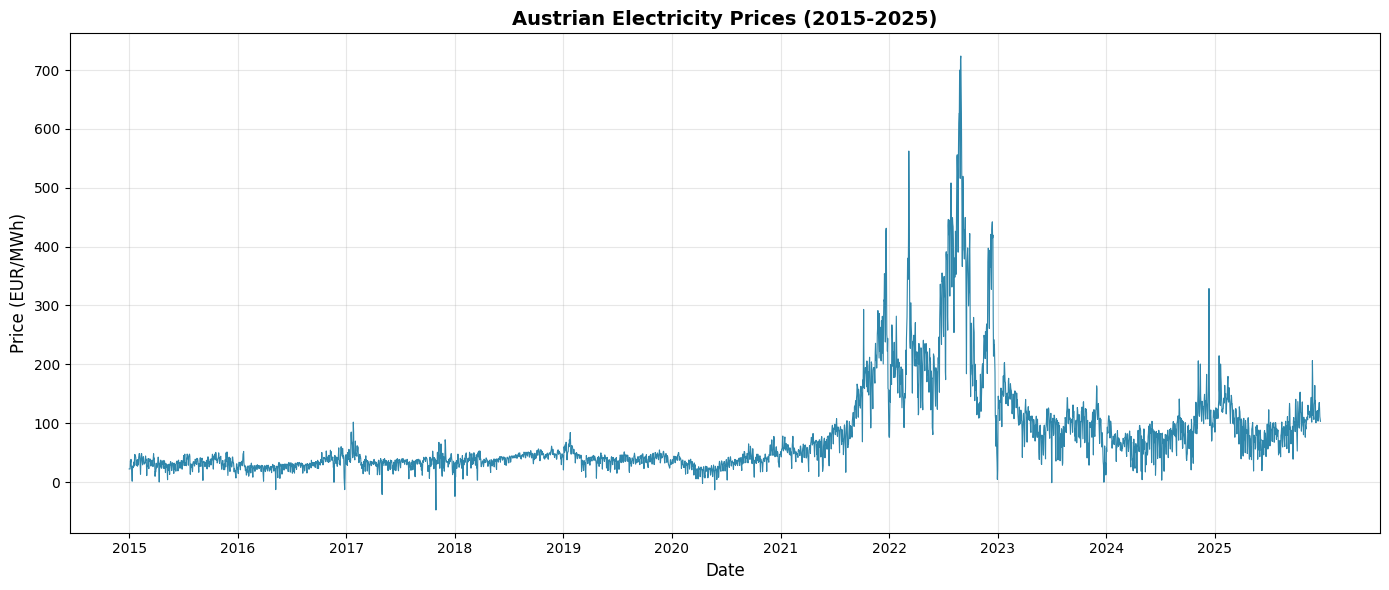

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

from utils.preprocessing import load_daily_data, load_monthly_data

# Load data
train, val, test = load_daily_data(use_existing=True)
train_m, val_m, test_m = load_monthly_data(use_existing=True)

# Combine train and validation data
data = pd.concat([train, val], ignore_index=True)
data_monthly = pd.concat([train_m, val_m], ignore_index=True)

# Create visualization
plt.figure(figsize=(14, 6))
plt.plot(data['ds'], data['y'], linewidth=0.8, color='#2E86AB')

# Set x-axis to show every year
years = pd.date_range(start=data['ds'].min(), end=data['ds'].max(), freq='YS')
plt.xticks(years, [year.year for year in years])

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (EUR/MWh)', fontsize=12)
plt.title('Austrian Electricity Prices (2015-2025)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../results/visualizations/electricity_prices.png', dpi=300, bbox_inches='tight')
plt.show()



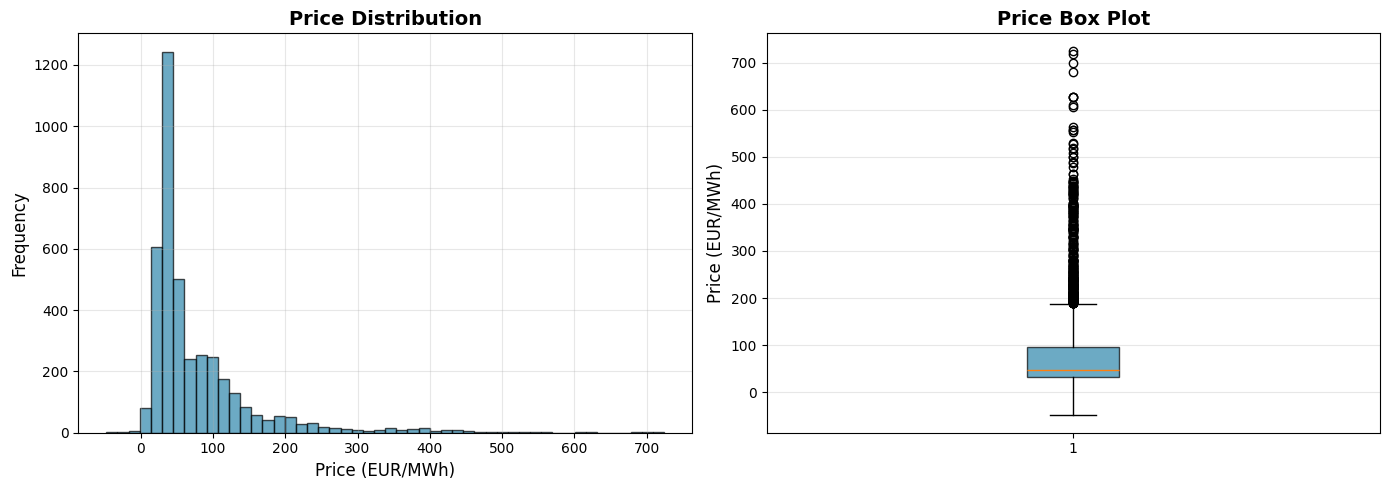

In [4]:
# Distribution Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(data['y'], bins=50, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Price (EUR/MWh)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Price Distribution', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

axes[1].boxplot(data['y'], vert=True, patch_artist=True, 
                boxprops=dict(facecolor='#2E86AB', alpha=0.7))
axes[1].set_ylabel('Price (EUR/MWh)', fontsize=12)
axes[1].set_title('Price Box Plot', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../results/visualizations/electricity_prices_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

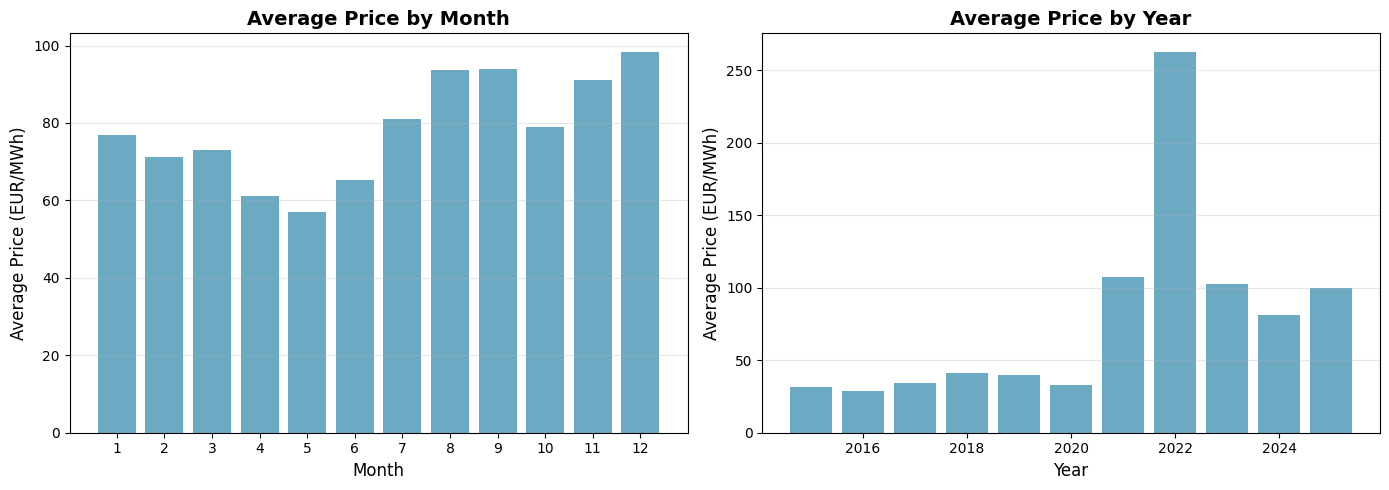

In [5]:
# Seasonal Patterns using monthly data
data_monthly['year'] = data_monthly['ds'].dt.year
data_monthly['month'] = data_monthly['ds'].dt.month

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Monthly average (across all years)
monthly_avg = data_monthly.groupby('month')["y"].mean()
axes[0].bar(monthly_avg.index, monthly_avg.values, color='#2E86AB', alpha=0.7)
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Average Price (EUR/MWh)', fontsize=12)
axes[0].set_title('Average Price by Month', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(1, 13))
axes[0].grid(alpha=0.3, axis='y')

# Yearly average
yearly_avg = data_monthly.groupby('year')['y'].mean()
axes[1].bar(yearly_avg.index, yearly_avg.values, color='#2E86AB', alpha=0.7)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Average Price (EUR/MWh)', fontsize=12)
axes[1].set_title('Average Price by Year', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../results/visualizations/electricity_prices_seasonal.png', dpi=300, bbox_inches='tight')
    
plt.show()

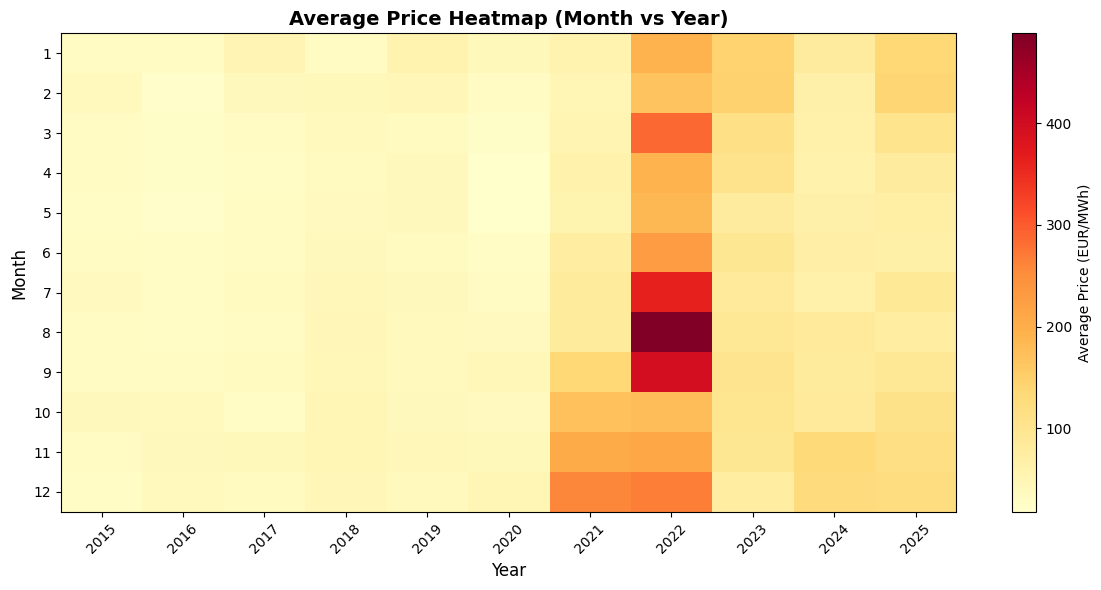

In [6]:
# Year-Month Heatmap using monthly data
import numpy as np

pivot_data = data_monthly.pivot_table(values='y', index='month', columns='year', aggfunc='mean')

plt.figure(figsize=(12, 6))
im = plt.imshow(pivot_data.values, aspect='auto', cmap='YlOrRd', interpolation='nearest')
plt.colorbar(im, label='Average Price (EUR/MWh)')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.title('Average Price Heatmap (Month vs Year)', fontsize=14, fontweight='bold')
plt.xticks(range(len(pivot_data.columns)), pivot_data.columns, rotation=45)
plt.yticks(range(len(pivot_data.index)), pivot_data.index)
plt.tight_layout()
plt.savefig('../results/visualizations/electricity_prices_heatmap.png', dpi=300, bbox_inches='tight')    
plt.show()